# BEATS DMM commissioning - energy scans

### STRIPE 1:
- Mo 0.2 mm
- Cu 0.0125 mm

### STRIPE 2:
- Mo 0.2 mm
- Pd 0.05 mm
- In 0.1 mm

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   28/11/2023

Last update:  28/11/2023
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
import dxchange
# from pandas_ods_reader import read_ods
# import h5py

astropy module not found
olefile module not found


In [63]:
from DMM.commissioning.tomoalign_simple import fit_profile

In [60]:
# plt.style.use('seaborn-v0_8-talk')
plt.style.use('seaborn-v0_8-notebook')
# plt.style.use('tableau-colorblind10')
# plt.style.use('default')

In [33]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [68]:
matplotlib.rcParams['figure.dpi'] = 200

In [12]:
work_dir = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/'

## 1. STRIPE 2 - Mo - 20.000 keV
### 1.1 Read SSCAN data

In [13]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/Mo/DMM_Mo_scan_003.h5'

In [14]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(82, 2160, 2560)


Pitch cradles encoders readout

In [51]:
ML1_p_mo = [-0.778193552, -0.776018853, -0.773714302, -0.771424896, -0.769119601, -0.766819519, -0.764547245, -0.762239963, -0.759953785, -0.757660655, -0.755385154, -0.753071416, -0.750799887, -0.748481433, -0.746211145, -0.743903615, -0.741613713, -0.739331259, -0.737041357, -0.734738792, -0.732442931, -0.730161967, -0.7278815, -0.72557968, -0.723280344, -0.720985476, -0.718695325, -0.716408651, -0.714106087, -0.711814943, -0.709529758, -0.707231415, -0.704974286, -0.702652852, -0.700352273, -0.698071558, -0.695776938, -0.693474126, -0.691196389, -0.688904997, -0.686606654 ]
ML2_p_mo = [-0.778207213, -0.775972678, -0.773692956, -0.771401564, -0.76909751, -0.766803635, -0.764513484, -0.762228548, -0.759916797, -0.75764204, -0.755340469, -0.75303989, -0.750766871, -0.748477466, -0.746160998, -0.743860171, -0.741569276, -0.739283098, -0.737009582, -0.734700811, -0.73243102, -0.730112317, -0.727819187, -0.725543437, -0.723269673, -0.720948487, -0.718654364, -0.716370918, -0.714075802, -0.711779692, -0.709499225, -0.707223475, -0.704917683, -0.702600718, -0.700337879, -0.698029852, -0.695743674, -0.693449303, -0.691181249, -0.688873719, -0.686585307]
ML1_p_flat = [-0.778208945, -0.775998245, -0.773700895, -0.771418193, -0.769135739, -0.766835409, -0.764525644, -0.762239963, -0.759974144, -0.757656683, -0.755397071, -0.753099472, -0.750774314, -0.748508495, -0.74622058, -0.743906842, -0.741617189, -0.73932381, -0.737043343, -0.73474053, -0.732449138, -0.730166188, -0.727888204, -0.72557397, -0.723278109, -0.720987214, -0.718699546, -0.716396733, -0.714096404, -0.711812957, -0.709516848, -0.707229428, -0.704962368, -0.702665018, -0.700374122, -0.698083972, -0.69577818, -0.693482319, -0.6911949, -0.688930819, -0.68661882]
ML2_p_flat = [-0.778202993, -0.775981865, -0.773692459, -0.771388901, -0.769111165, -0.766807359, -0.764508022, -0.762210423, -0.759921266, -0.757649489, -0.755349159, -0.753045353, -0.750743036, -0.748440472, -0.746171425, -0.743879537, -0.74159907, -0.739295264, -0.736998658, -0.734724149, -0.732416619, -0.730138138, -0.727836815, -0.725538471, -0.723245341, -0.720952212, -0.71865933, -0.716388546, -0.714071084, -0.711789127, -0.709498977, -0.70720684, -0.704918428, -0.702605932, -0.700340113, -0.698043011, -0.695736722, -0.693446572, -0.69117827, -0.688866023, -0.686598962]

### 1.2 Correct flat-field

In [19]:
data_mo = data[0:41,:,:]
data_flat = data[41:,:,:]
print(data_mo.shape)

(41, 2160, 2560)


In [20]:
data_norm = data_mo/data_flat

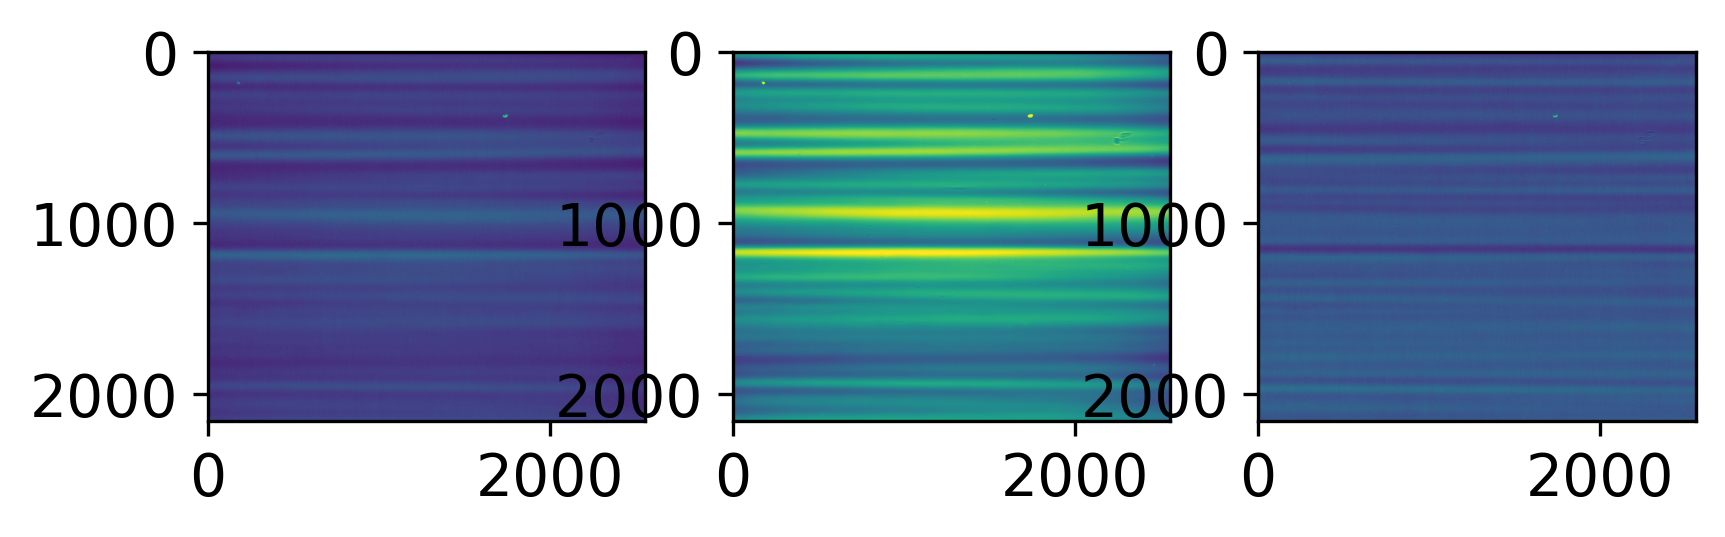

In [34]:
step = 21
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_mo[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 1.3 Get intensity average for each step

In [41]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

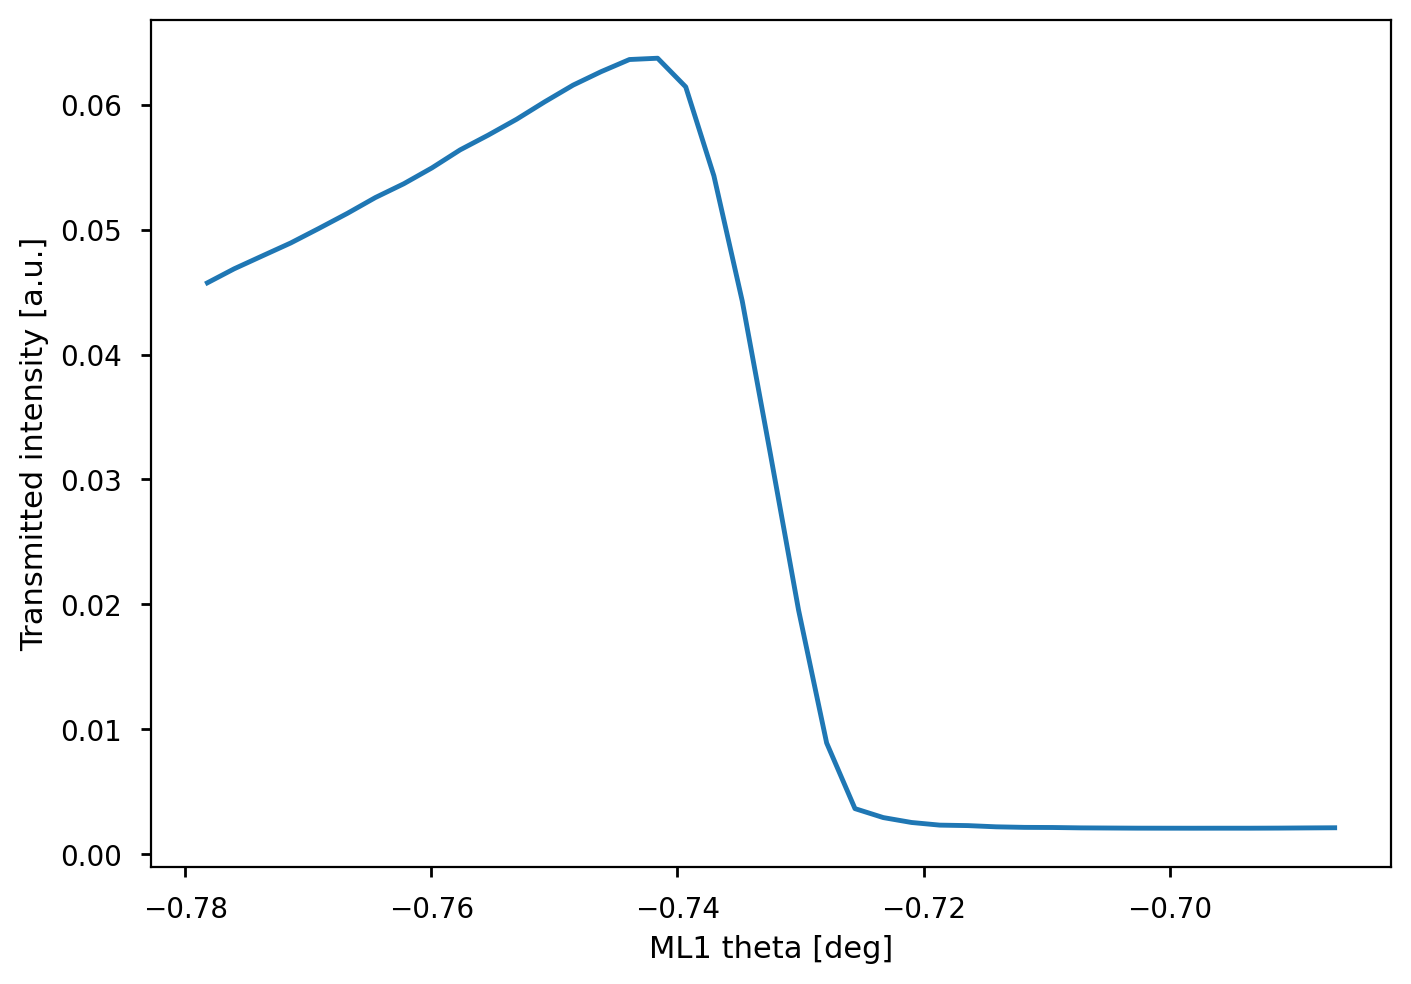

In [69]:
plt.plot(ML1_p_mo,I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 1.4 Perform curve fit

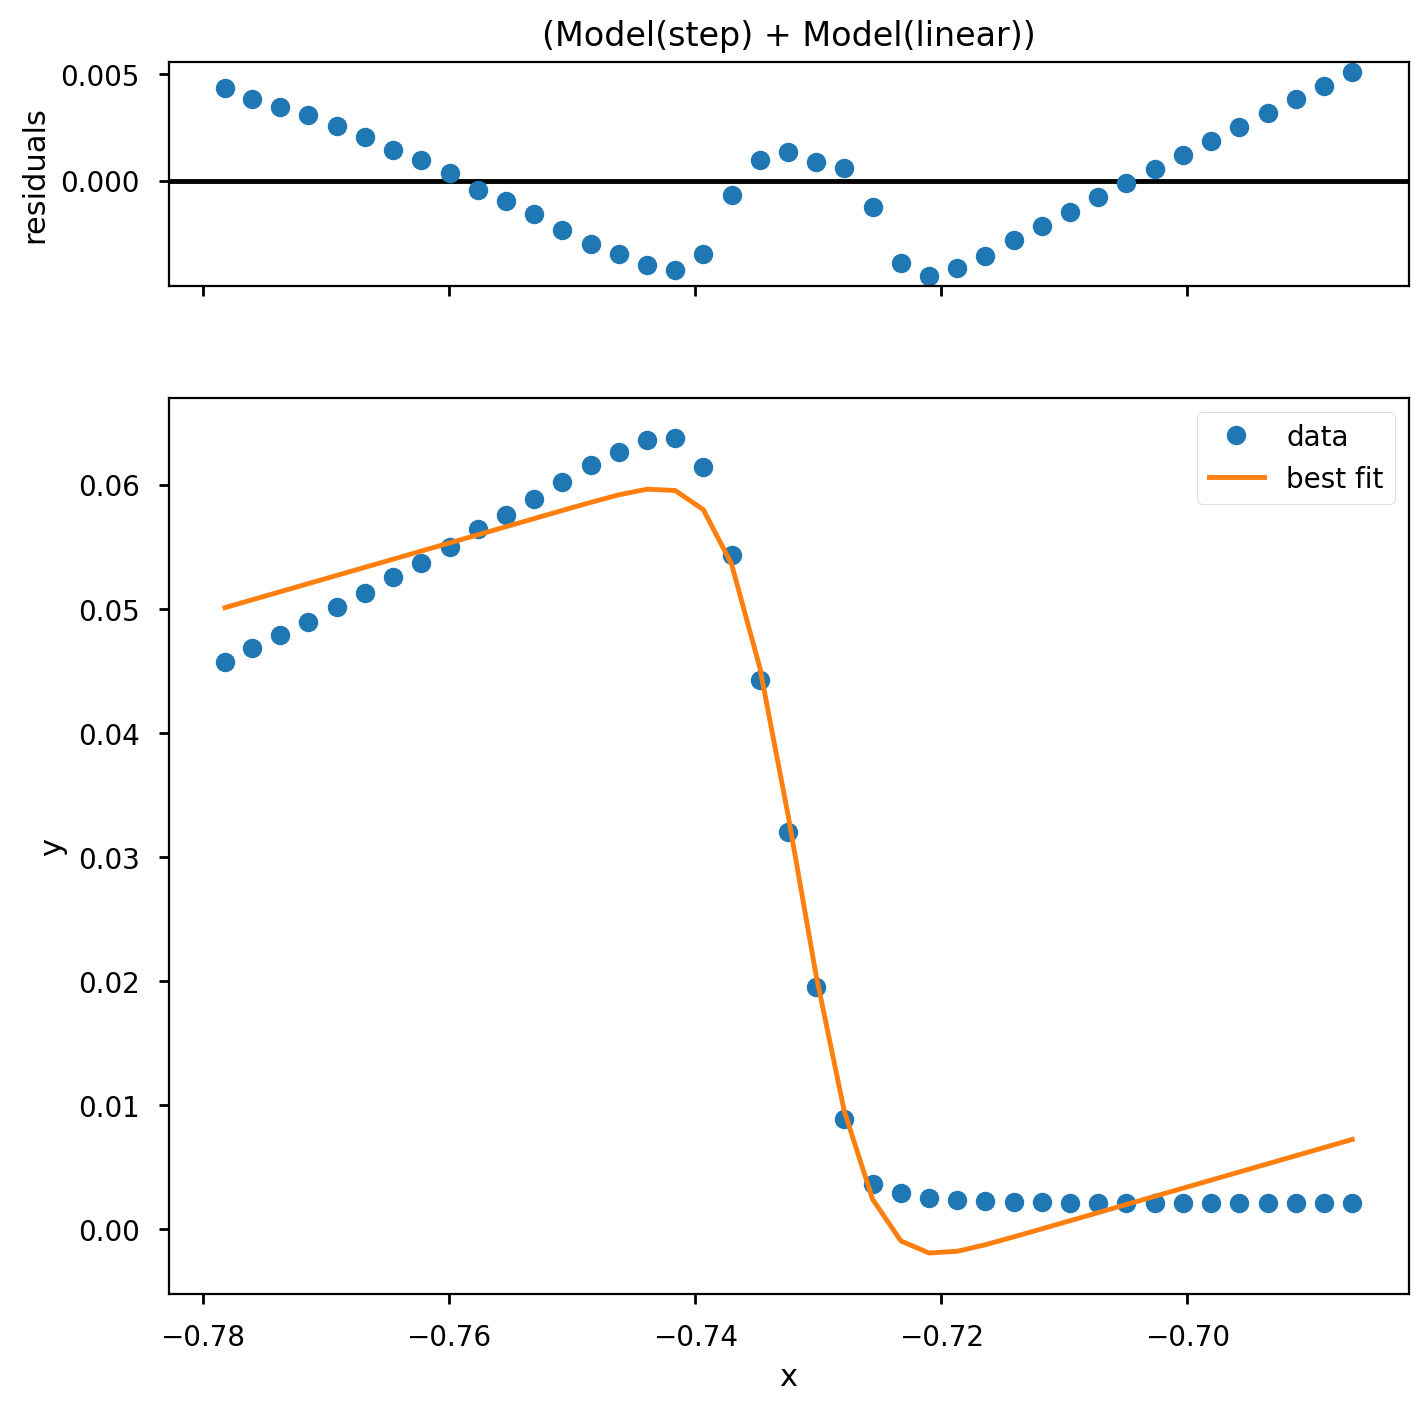

In [70]:
fit_profile(ML1_p_mo, I_norm, profile='step', background='linear', plot=True) # , width=1400

## 2. STRIPE 2 - Pd - 24.350 keV
### 2.1 Read SSCAN data
Edge scan images

In [73]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/Pd/DMM_Pd_scan_000.h5'

In [74]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(82, 2160, 2560)


Pitch cradles encoders readout

In [75]:
ML1_p_edge = [-0.640010882, -0.637755491, -0.6354713, -0.633182639, -0.630868157, -0.62859191, -0.626314174, -0.624006396, -0.621729901, -0.619436771, -0.617137434, -0.61484207, -0.612563589, -0.610250845, -0.607961191, -0.605687675, -0.603395787, -0.601116064, -0.598828149, -0.596525832, -0.594212343, -0.591947021, -0.589656623, -0.587348596, -0.585045287, -0.582773757, -0.580472682, -0.578172104, -0.575911003, -0.573621349, -0.571323998, -0.569030124, -0.566728304, -0.564426733, -0.562143783, -0.559853136, -0.557554295, -0.5552706, -0.552988395, -0.55068161, -0.548413308]
ML2_p_edge = [-0.639970666, -0.637716764, -0.635454173, -0.633134229, -0.630841596, -0.628569073, -0.626284137, -0.62397462, -0.621689684, -0.619381906, -0.617101686, -0.614816005, -0.612535289, -0.610222297, -0.607927677, -0.605641251, -0.603340176, -0.601062688, -0.598772538, -0.596481394, -0.594220541, -0.5918857, -0.589599771, -0.587306641, -0.585018725, -0.582754892, -0.580432714, -0.578142067, -0.575852661, -0.573573683, -0.571290485, -0.568961354, -0.566687094, -0.564404888, -0.562109276, -0.559803235, -0.557527485, -0.555240562, -0.552940232, -0.550662993, -0.548355959]
ML1_p_flat = [-0.639974385, -0.637772871, -0.635463355, -0.633171963, -0.630875605, -0.628594641, -0.626303001, -0.624003416, -0.621722949, -0.619433543, -0.617139172, -0.61485647, -0.612543478, -0.610254817, -0.607964667, -0.605670047, -0.603383621, -0.601094712, -0.598803569, -0.596492066, -0.594233447, -0.591928152, -0.589629312, -0.587342637, -0.585048514, -0.582752902, -0.580469703, -0.57816987, -0.575889651, -0.573604218, -0.571319778, -0.569040303, -0.566743698, -0.564426485, -0.562161659, -0.559839232, -0.557560254, -0.555278297, -0.55297896, -0.550694272, -0.548401887]
ML2_p_flat = [-0.639945837, -0.637705592, -0.635438531, -0.633142422, -0.630873128, -0.628552935, -0.626279916, -0.623968662, -0.62170036, -0.619383395, -0.617122045, -0.614809798, -0.612532806, -0.610245139, -0.607957223, -0.605635541, -0.603350853, -0.60105524, -0.598781476, -0.596476677, -0.594199189, -0.591918722, -0.589598281, -0.587324517, -0.585005318, -0.582745954, -0.580448355, -0.578142315, -0.575839006, -0.573581877, -0.571284774, -0.568996114, -0.566698018, -0.564395205, -0.562116724, -0.559799263, -0.557515568, -0.555236342, -0.552948426, -0.55065033, -0.548350745]

### 2.2 Correct flat-field

In [76]:
data_edge = data[0:41,:,:]
data_flat = data[41:,:,:]
print(data_edge.shape)

(41, 2160, 2560)


In [77]:
data_norm = data_edge/data_flat

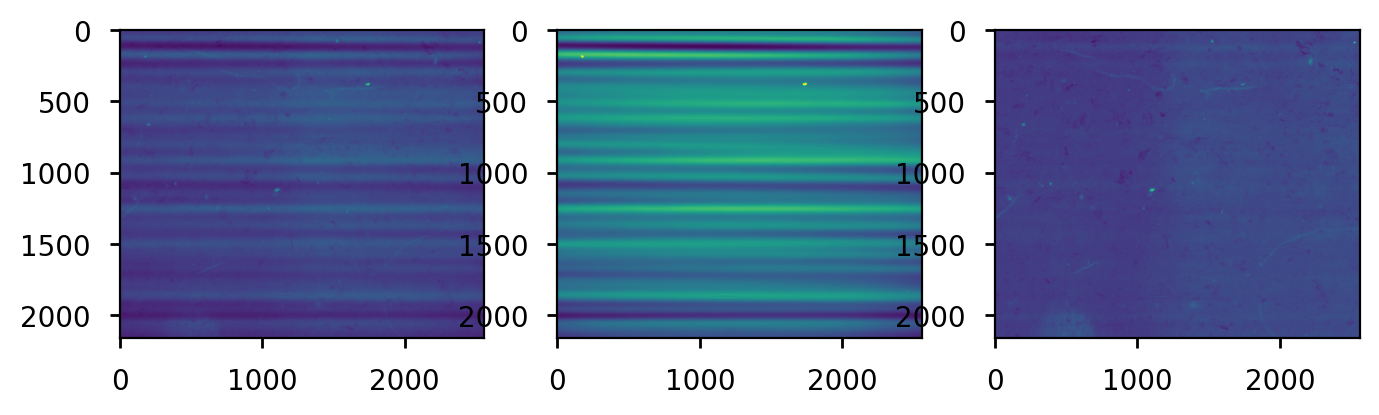

In [81]:
step = 30
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_edge[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 2.3 Get intensity average for each step

In [82]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

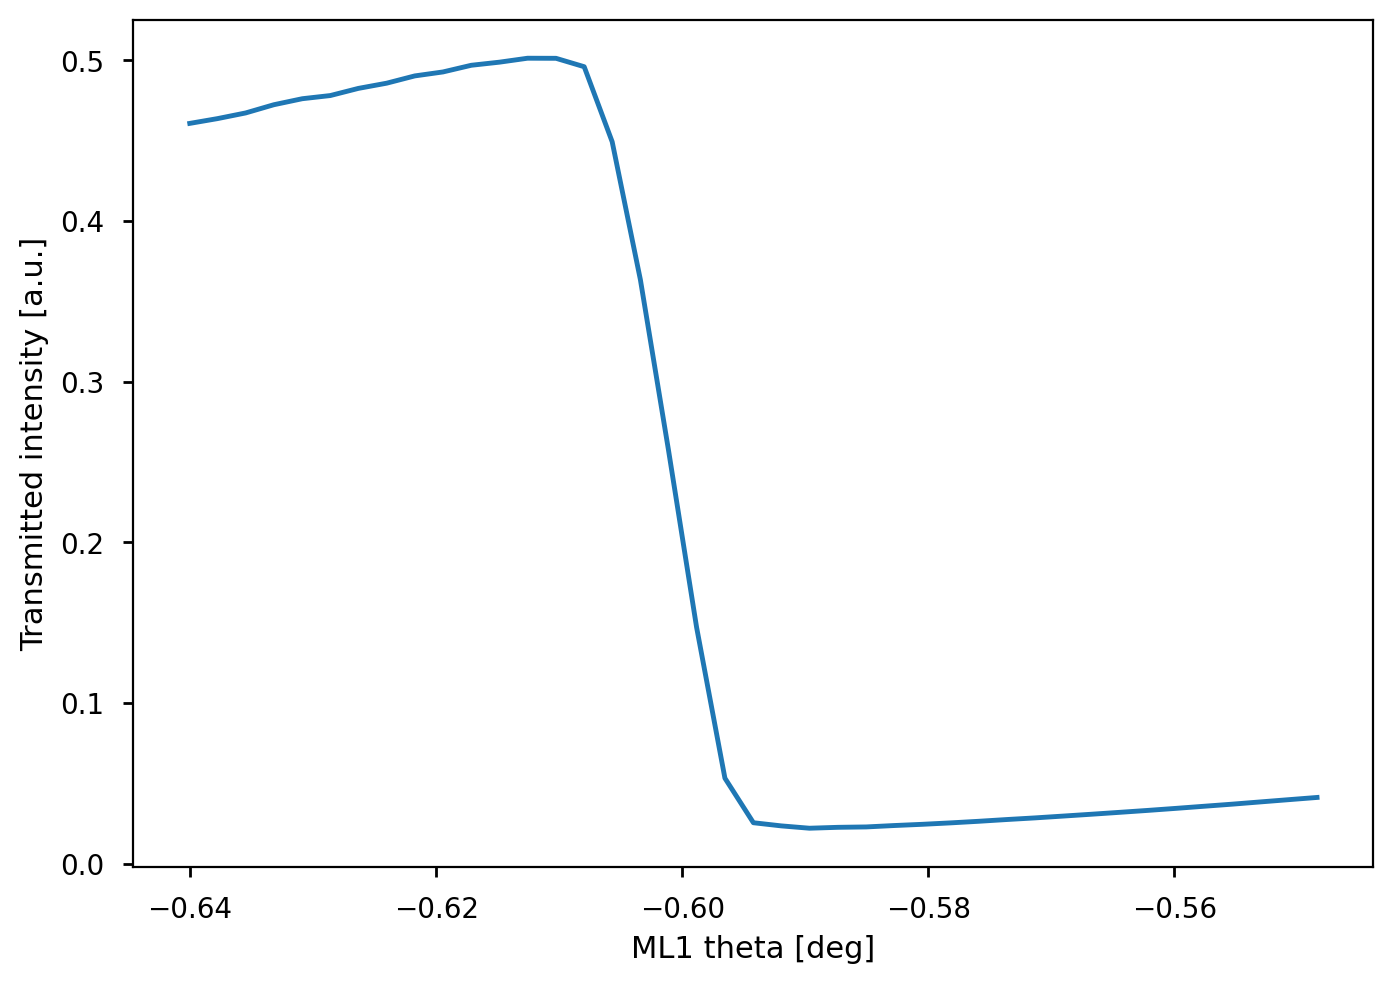

In [83]:
plt.plot(ML1_p_edge,I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 2.4 Perform curve fit

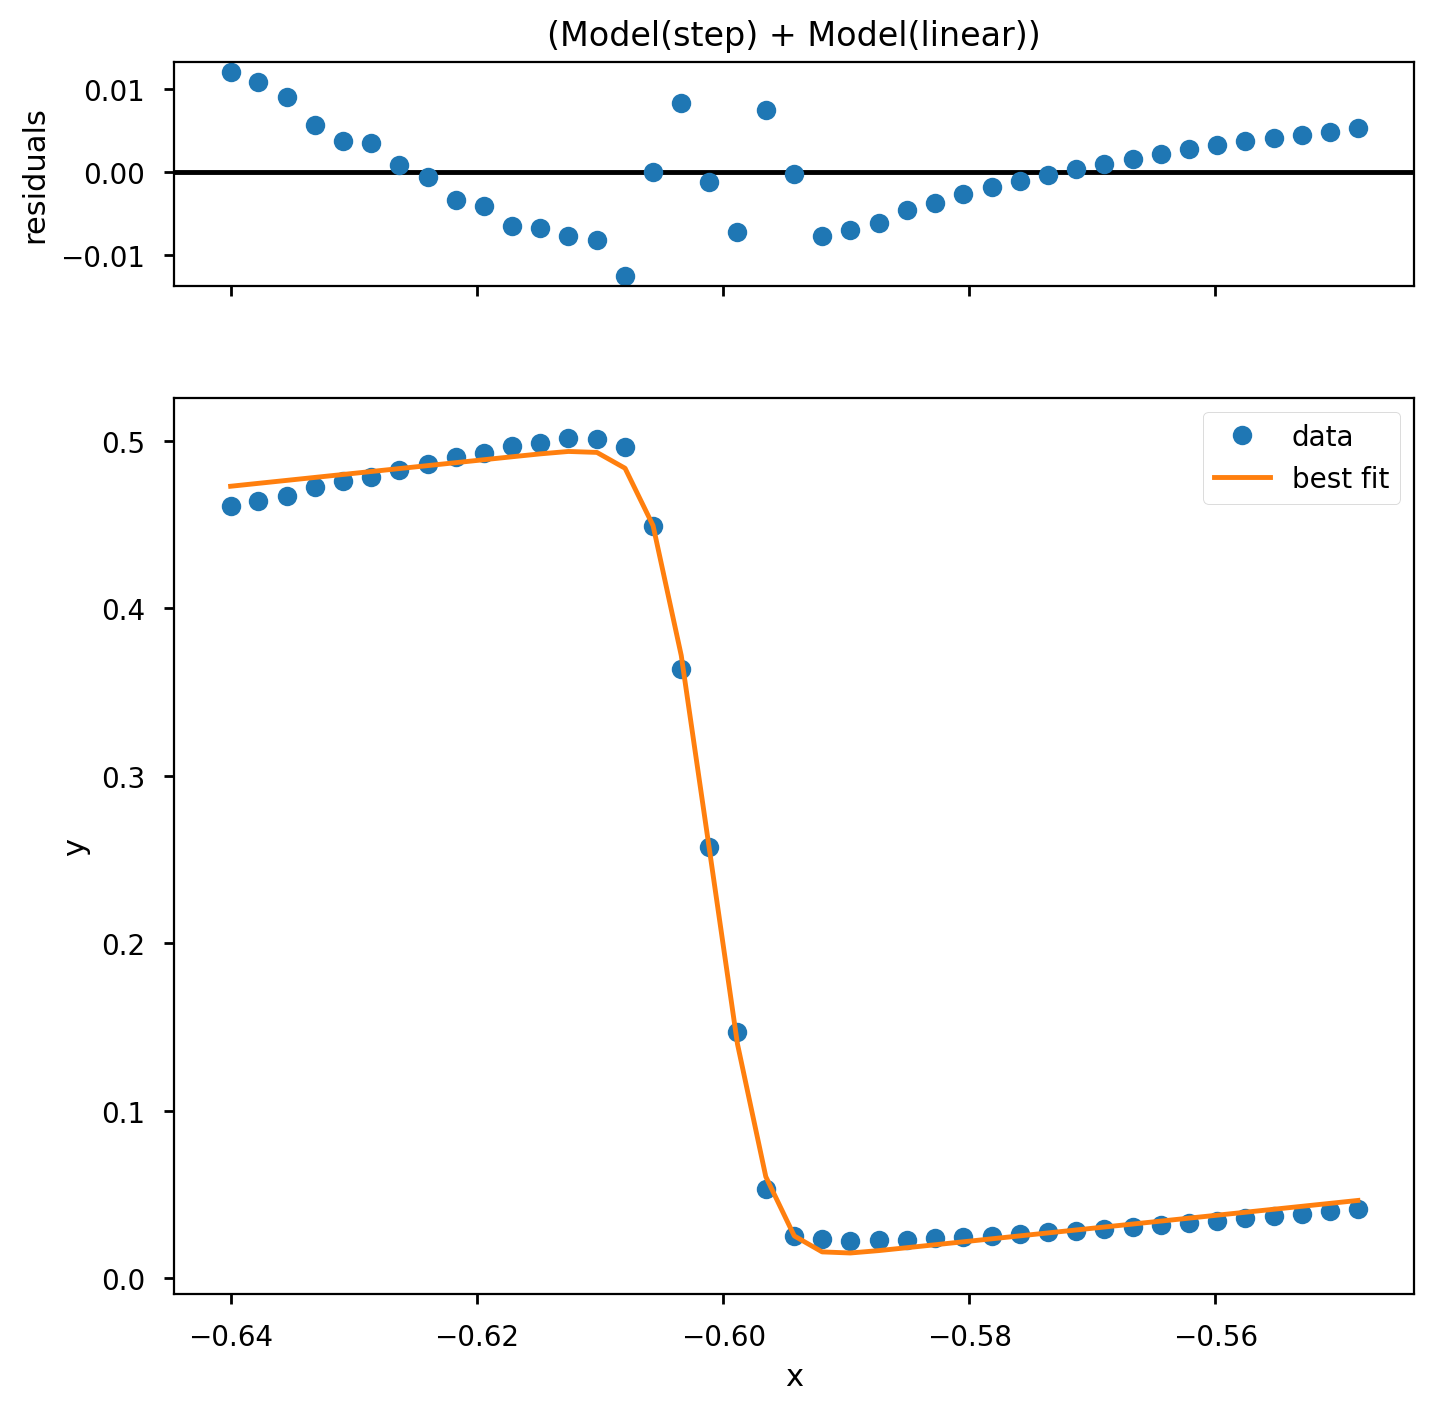

In [84]:
fit_profile(ML1_p_edge, I_norm, profile='step', background='linear', plot=True) # , width=1400

## 3. STRIPE 2 - In - 33.169 keV
### 3.1 Read SSCAN data
Edge scan images

In [88]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/In/DMM_In_scan_001.h5'

In [89]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(82, 2160, 2560)


Pitch cradles encoders readout

In [90]:
ML1_p_edge = [-0.461837728, -0.459602447, -0.457315525, -0.455018174, -0.452741679, -0.450428935, -0.448137543, -0.44584491, -0.443549546, -0.441245988, -0.438957576, -0.436692998, -0.434381744, -0.432083649, -0.429797719, -0.427530162, -0.425219901, -0.422913861, -0.420625448, -0.418347215, -0.416032485, -0.413751769, -0.411463357, -0.409170476, -0.406879829, -0.404615499, -0.402310204, -0.40000317, -0.397723944, -0.395425104, -0.39314414, -0.390867645, -0.38855366, -0.386259537, -0.383978573, -0.38168594, -0.379374685, -0.377087266, -0.374822937, -0.372528814, -0.370219546]
ML2_p_edge = [-0.461805703, -0.45959103, -0.457291197, -0.454994094, -0.452675392, -0.450393434, -0.448135561, -0.445830762, -0.443542101, -0.441218184, -0.438946903, -0.436664449, -0.434377527, -0.432094328, -0.429765694, -0.427471075, -0.425214939, -0.422888539, -0.42059392, -0.418302528, -0.416035964, -0.413717758, -0.41143878, -0.409146395, -0.406854259, -0.40457255, -0.402250868, -0.399962703, -0.397708057, -0.39537843, -0.393086293, -0.390831399, -0.388532062, -0.386214601, -0.38393612, -0.381646714, -0.379350108, -0.377077089, -0.374767076, -0.372478912, -0.370190748]
ML1_p_flat = [-0.461818858, -0.459586061, -0.457304352, -0.455032078, -0.452724796, -0.450441349, -0.448133571, -0.445842427, -0.44355476, -0.441275534, -0.438957824, -0.436674626, -0.434382489, -0.432104504, -0.429797223, -0.427509555, -0.425235543, -0.422949365, -0.420635131, -0.418364595, -0.416043658, -0.413757232, -0.411452929, -0.40917122, -0.406870642, -0.404572547, -0.402308466, -0.400024026, -0.397712275, -0.395419145, -0.393125767, -0.390841824, -0.388542487, -0.38624464, -0.383960448, -0.381679236, -0.379413169, -0.377093225, -0.374817475, -0.37250771, -0.370232705]
ML2_p_flat = [-0.461793785, -0.459576878, -0.457282755, -0.455009736, -0.452713875, -0.450420001, -0.448116691, -0.445823313, -0.443522487, -0.441214956, -0.438928779, -0.436648808, -0.434343016, -0.432086383, -0.429774136, -0.427475544, -0.425176703, -0.422912871, -0.420619244, -0.418324377, -0.416005177, -0.41371602, -0.411437539, -0.409168244, -0.406840603, -0.404567088, -0.402284386, -0.399992497, -0.39770334, -0.395367009, -0.39309697, -0.390791674, -0.388525359, -0.386232974, -0.383921471, -0.381644231, -0.379346136, -0.377037861, -0.374772787, -0.372482885, -0.370178334]

### 3.2 Correct flat-field

In [91]:
data_edge = data[0:41,:,:]
data_flat = data[41:,:,:]
print(data_edge.shape)

(41, 2160, 2560)


In [92]:
data_norm = data_edge/data_flat

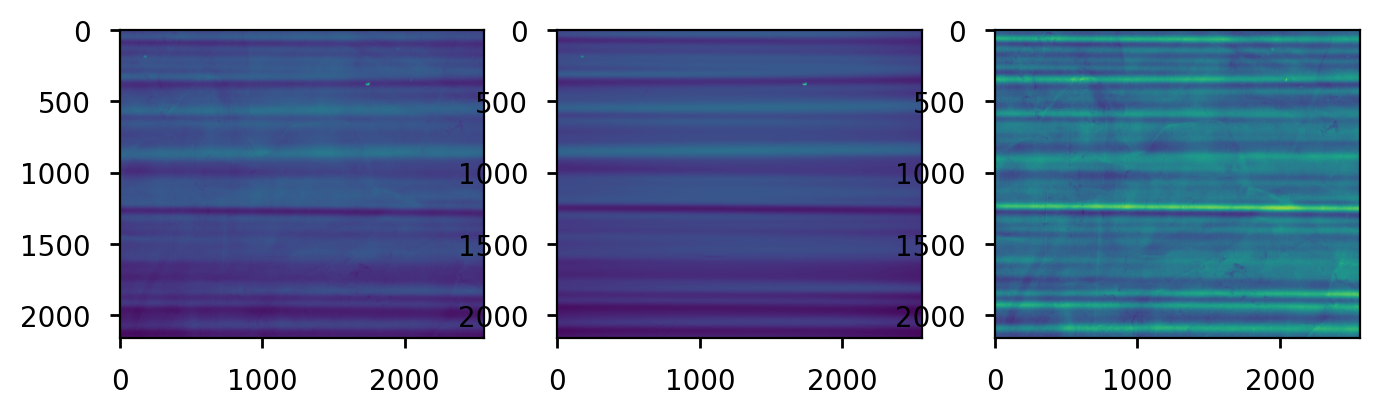

In [93]:
step = 30
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_edge[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 3.3 Get intensity average for each step

In [94]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

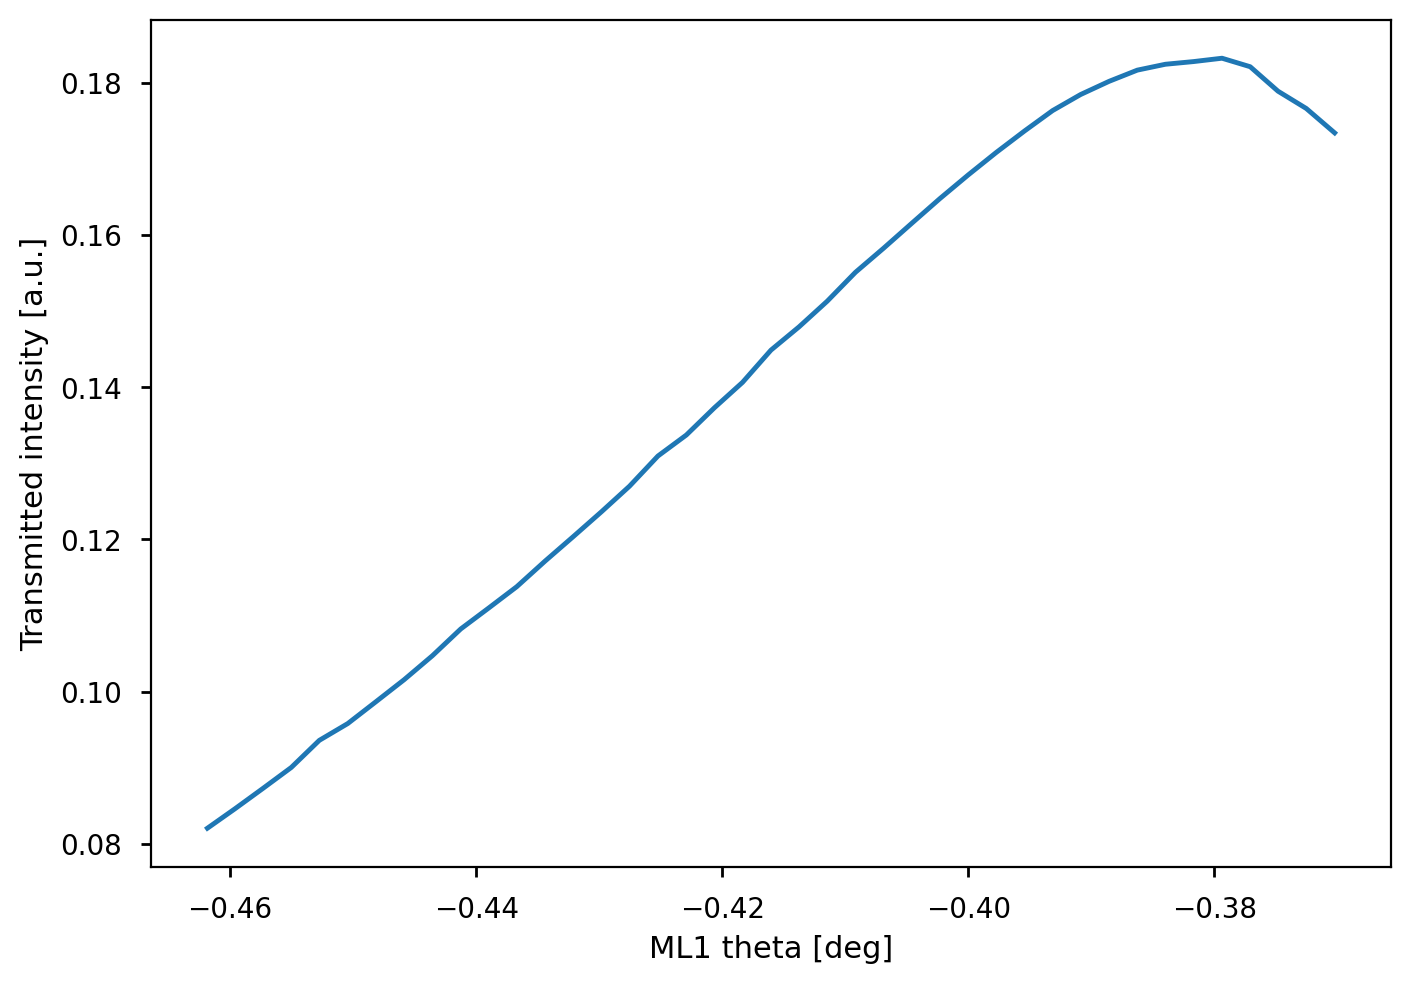

In [95]:
plt.plot(ML1_p_edge,I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 3.4 Read a larger scan

In [96]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/In/DMM_In_scan_002.h5'

In [99]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(162, 2160, 2560)


Pitch cradles encoders readout

In [98]:
ML1_p_edge = [-0.461790306, -0.459599965, -0.457303359, -0.455027857, -0.45271412, -0.45042968, -0.448119419, -0.44586229, -0.443559229, -0.44122985, -0.438940693, -0.43667115, -0.434367096, -0.432070242, -0.429763456, -0.427468589, -0.425219156, -0.422903185, -0.420615765, -0.418322884, -0.416012126, -0.413727686, -0.411412708, -0.40913522, -0.406861952, -0.40454747, -0.402241182, -0.399961211, -0.397654177, -0.395389848, -0.393074621, -0.390781491, -0.388508224, -0.386199949, -0.383902102, -0.381617662, -0.379293497, -0.377007071, -0.374739514, -0.372423543, -0.37014531, -0.367842, -0.365559547, -0.363260458, -0.360989674, -0.358668736, -0.356378586, -0.354085456, -0.351809458, -0.349516328, -0.347224191, -0.344907971, -0.34263818, -0.340313767, -0.338029079, -0.335741659, -0.333462185, -0.331172531, -0.328857304, -0.326585775, -0.324265334, -0.321984867, -0.319695213, -0.317376262, -0.315083132, -0.312797948, -0.310524184, -0.308228571, -0.305912848, -0.303641815, -0.301313181, -0.299055804, -0.296741073, -0.294456385, -0.29215531, -0.289864167, -0.287565823, -0.285260776, -0.282989247, -0.280699841, -0.278390325]
ML2_p_edge = [-0.46180893, -0.459565457, -0.457283996, -0.454974232, -0.452692026, -0.450409821, -0.448108746, -0.445817354, -0.443512804, -0.441231591, -0.438944669, -0.436616531, -0.43432787, -0.432044424, -0.429759984, -0.427477778, -0.425152868, -0.422880594, -0.420556926, -0.418256844, -0.415964956, -0.41367853, -0.411407745, -0.409103443, -0.406796906, -0.404530342, -0.402221074, -0.399927447, -0.397640028, -0.395349878, -0.393043837, -0.390732086, -0.388467012, -0.386170407, -0.383874298, -0.38156925, -0.379273638, -0.376999625, -0.374686385, -0.372393752, -0.370097891, -0.367809975, -0.365503686, -0.363227439, -0.36090973, -0.358632987, -0.356331167, -0.354039527, -0.351755087, -0.349461461, -0.347169572, -0.344858318, -0.342563698, -0.340270817, -0.338003012, -0.335674129, -0.333400862, -0.331111208, -0.328817334, -0.326526935, -0.324202273, -0.321937944, -0.319617007, -0.317363106, -0.315037451, -0.312765922, -0.310461371, -0.308178669, -0.305881567, -0.30357354, -0.301300273, -0.29898306, -0.29667975, -0.294394565, -0.292096718, -0.28982792, -0.287520638, -0.285244392, -0.282926682, -0.280646463, -0.278370216]
ML1_p_flat = [-0.461832514, -0.459591523, -0.457323718, -0.455013457, -0.452718589, -0.450436384, -0.448141268, -0.445840689, -0.443536139, -0.441249961, -0.438966266, -0.436665936, -0.43436064, -0.432074462, -0.429786546, -0.427499872, -0.425185638, -0.422915102, -0.420612041, -0.418318166, -0.416016595, -0.413725203, -0.411412211, -0.40913224, -0.406841841, -0.40454176, -0.402275941, -0.39998157, -0.397655915, -0.395388855, -0.393077352, -0.390772553, -0.388478927, -0.386197466, -0.383914516, -0.38161791, -0.379341664, -0.377035623, -0.374750935, -0.372452095, -0.370151765, -0.367842993, -0.365567988, -0.363260955, -0.360977011, -0.358688351, -0.356363193, -0.354093401, -0.351788602, -0.349501928, -0.347211529, -0.344925848, -0.342632221, -0.340336857, -0.337997299, -0.335720307, -0.333434626, -0.331145965, -0.328848863, -0.326573113, -0.324278493, -0.321994302, -0.319684537, -0.317365338, -0.315095795, -0.31279472, -0.310513756, -0.308193563, -0.305923524, -0.303612021, -0.301346947, -0.299023527, -0.296729404, -0.294444468, -0.292147614, -0.28985647, -0.287560361, -0.285277907, -0.282963177, -0.280686434, -0.278374186]
ML2_p_flat = [-0.46178733, -0.459562229, -0.457293183, -0.454985653, -0.45267266, -0.450380772, -0.448113215, -0.445808913, -0.443510569, -0.441213467, -0.438923813, -0.436627207, -0.434322656, -0.4320623, -0.42977066, -0.427476785, -0.425181172, -0.422881836, -0.420569836, -0.418274969, -0.415996487, -0.413676295, -0.411410724, -0.409109153, -0.406804851, -0.404513459, -0.402234978, -0.399926951, -0.397626124, -0.395328277, -0.393051037, -0.3907445, -0.388461302, -0.386144585, -0.383878022, -0.381590851, -0.379278851, -0.376980508, -0.374674716, -0.372386303, -0.370094415, -0.367800788, -0.365514611, -0.363206832, -0.360919413, -0.358661291, -0.356336629, -0.354052437, -0.35175037, -0.34947015, -0.347158399, -0.344884636, -0.342597713, -0.3402805, -0.337994074, -0.335705909, -0.3334098, -0.331105746, -0.328804175, -0.326514769, -0.324254413, -0.32195011, -0.319638111, -0.317332319, -0.315043161, -0.312784046, -0.310485702, -0.30818711, -0.30588107, -0.303593154, -0.301285127, -0.299008633, -0.296708799, -0.294401021, -0.292100194, -0.289829161, -0.287519149, -0.285257302, -0.282959455, -0.280652918, -0.278347126]

### 3.5 Correct flat-field

In [102]:
data_edge = data[0:81,:,:]
data_flat = data[81:,:,:]
print(data_edge.shape)

(81, 2160, 2560)


In [103]:
data_norm = data_edge/data_flat

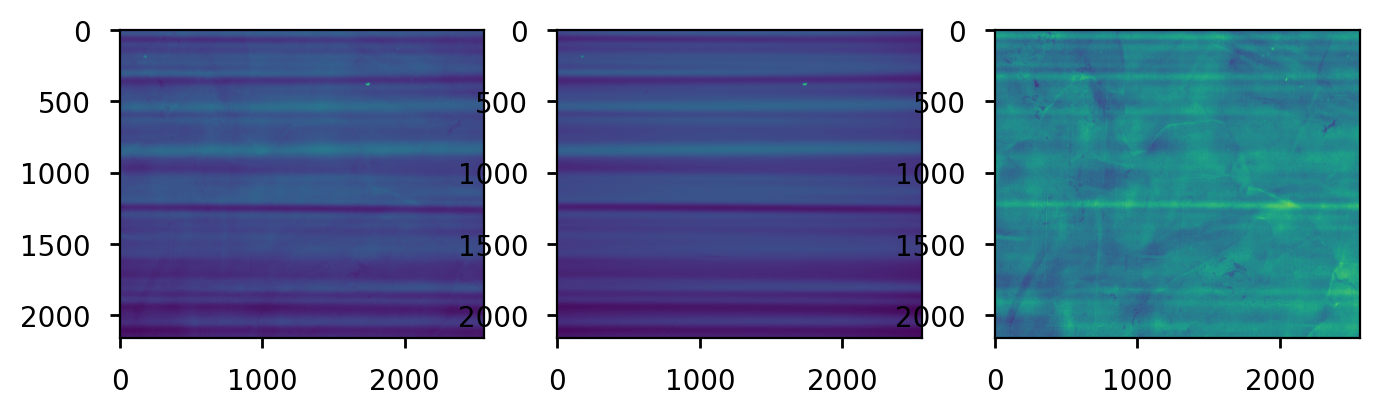

In [109]:
step = 30
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_edge[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 3.6 Get intensity average for each step

In [105]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

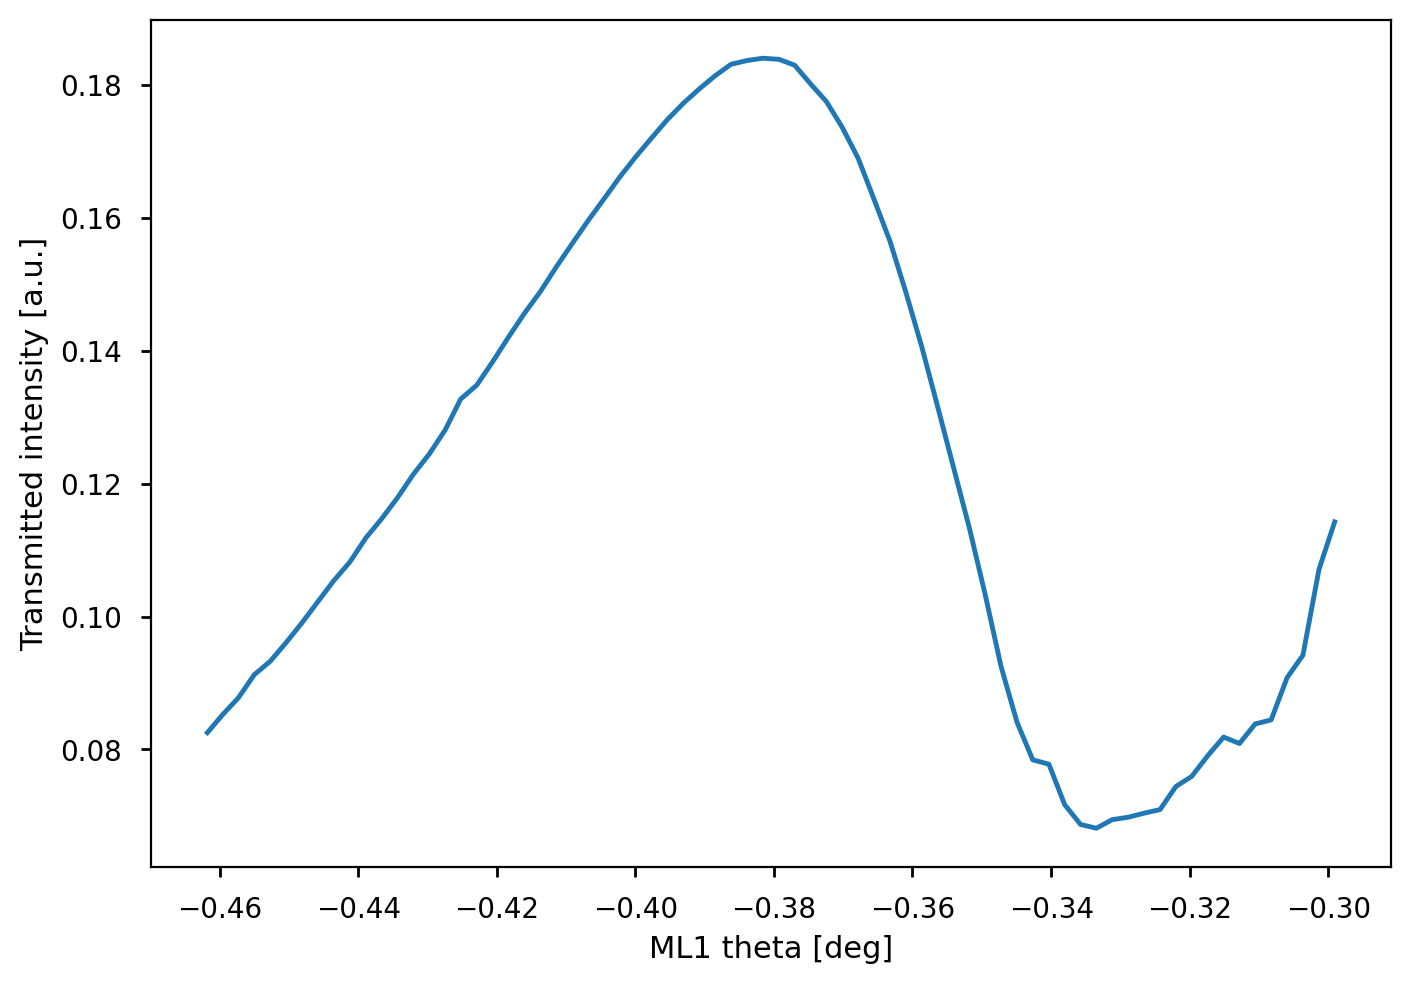

In [112]:
plt.plot(ML1_p_edge[:72],I_norm[:72])
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 3.4 Perform curve fit

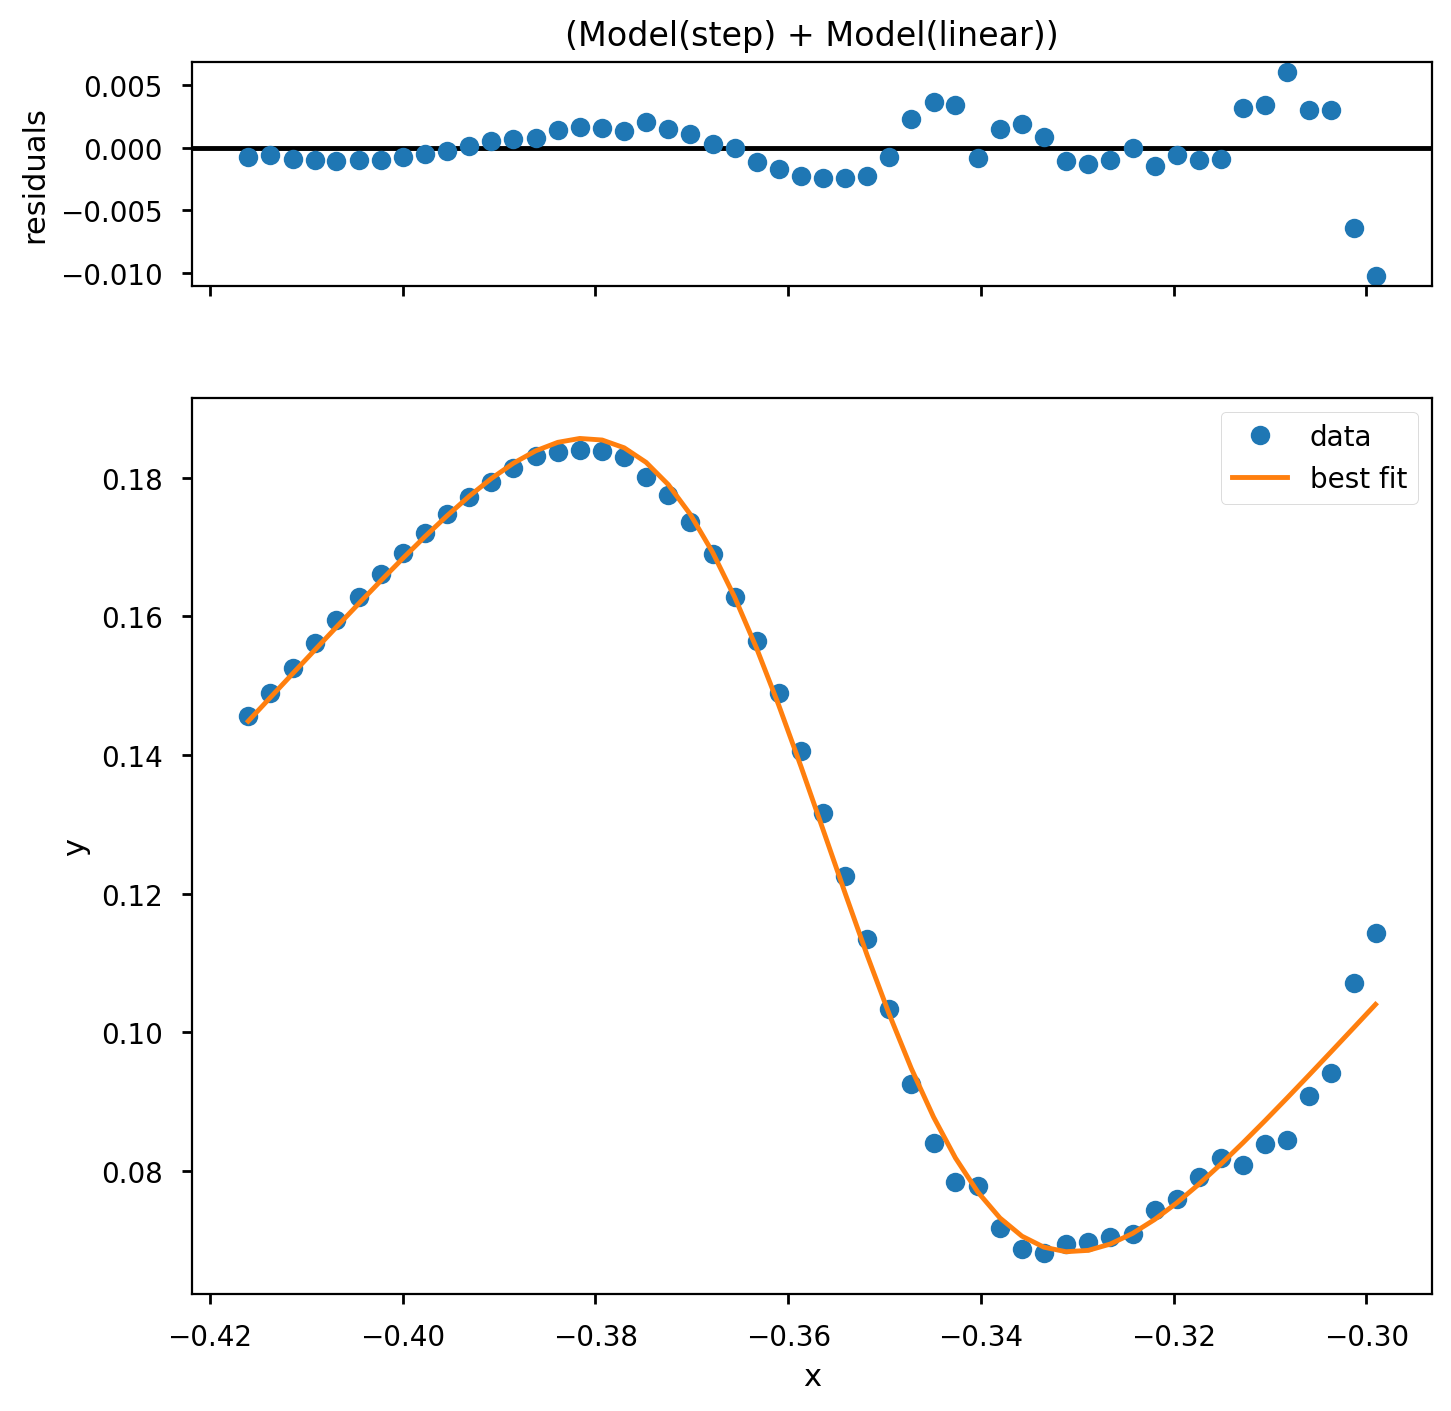

In [118]:
fit_profile(ML1_p_edge[20:72], I_norm[20:72], profile='step', background='linear', plot=True) # , width=1400

## 4. STRIPE 1 - Mo - 20.000 keV
### 4.1 Read SSCAN data
Edge scan images

In [120]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/Mo/DMM_stripe1_Mo_scan_000.h5'

In [121]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(81, 2160, 2560)


Pitch cradles encoders readout

In [122]:
ML1_p_edge = [-0.519851478, -0.517587645, -0.515297991, -0.513025717, -0.510723898, -0.50843474, -0.506149059, -0.503866109, -0.501557089, -0.499257752, -0.496993175, -0.49467621, -0.492399963, -0.490094171, -0.487795579, -0.485525788, -0.483240355, -0.480928108, -0.478627529, -0.476338124, -0.47406585, -0.471780665, -0.469481328, -0.467178515, -0.464892089, -0.462598463, -0.46029714, -0.458022383, -0.455725032, -0.453431406, -0.451142497, -0.448838443, -0.446541092, -0.444280239, -0.441978171, -0.439682558, -0.437376518, -0.435112189, -0.432821542, -0.430508053, -0.428242234]
ML2_p_edge = [-0.519820447, -0.517563318, -0.515272919, -0.512984258, -0.510696094, -0.508395516, -0.506147077, -0.503812732, -0.501516871, -0.499234169, -0.496951467, -0.494650393, -0.492380353, -0.490092437, -0.487771251, -0.485493763, -0.483214786, -0.480921159, -0.478612388, -0.476293437, -0.474007259, -0.471716115, -0.469443096, -0.467162877, -0.464832505, -0.46254881, -0.460286715, -0.457977199, -0.455665696, -0.453408816, -0.451092596, -0.448785562, -0.446533399, -0.444217179, -0.441927525, -0.439631168, -0.437341514, -0.435042425, -0.432755502, -0.430461131, -0.428164525]
ML1_p_flat = [-0.519815974, -0.517594597, -0.515307923, -0.513001137, -0.51072216, -0.508428037, -0.506139376, -0.503865116, -0.501598056, -0.49928705, -0.496968347, -0.494701535, -0.492399715, -0.490099385, -0.487825373, -0.485516105, -0.483220244, -0.480950701, -0.478635474, -0.476333406, -0.474052194, -0.471765023, -0.469493494, -0.467167839, -0.464889855, -0.462596973, -0.460301609, -0.458010714, -0.455742908, -0.453436371, -0.451124372, -0.448825035, -0.446572872, -0.444261121, -0.441972709, -0.439674862, -0.437403829, -0.435090092, -0.432806397, -0.430525929, -0.428214675]
ML2_p_flat = [-0.519790405, -0.517562076, -0.515271181, -0.512987486, -0.510684673, -0.508417861, -0.506090717, -0.503814222, -0.501525313, -0.499240128, -0.496931108, -0.494641206, -0.492355773, -0.490061402, -0.487786397, -0.485497239, -0.483200385, -0.480911228, -0.478594015, -0.476327948, -0.474031839, -0.471719591, -0.469424723, -0.467128366, -0.46484765, -0.462579845, -0.460298136, -0.457969254, -0.455671407, -0.453399878, -0.451122141, -0.448792266, -0.446515523, -0.444239028, -0.441923304, -0.43962645, -0.437362866, -0.435070977, -0.432756744, -0.430471559, -0.428197795]

### 4.2 Correct flat-field

In [125]:
data_edge = data[0:40,:,:]
data_flat = data[41:,:,:]
print(data_edge.shape)

(40, 2160, 2560)


In [126]:
data_norm = data_edge/data_flat

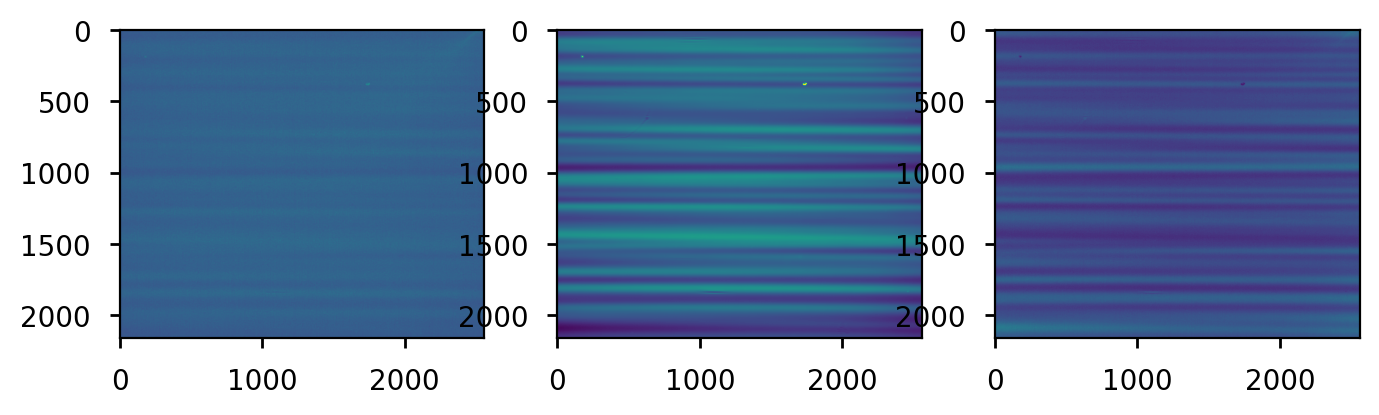

In [127]:
step = 30
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_edge[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 4.3 Get intensity average for each step

In [128]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

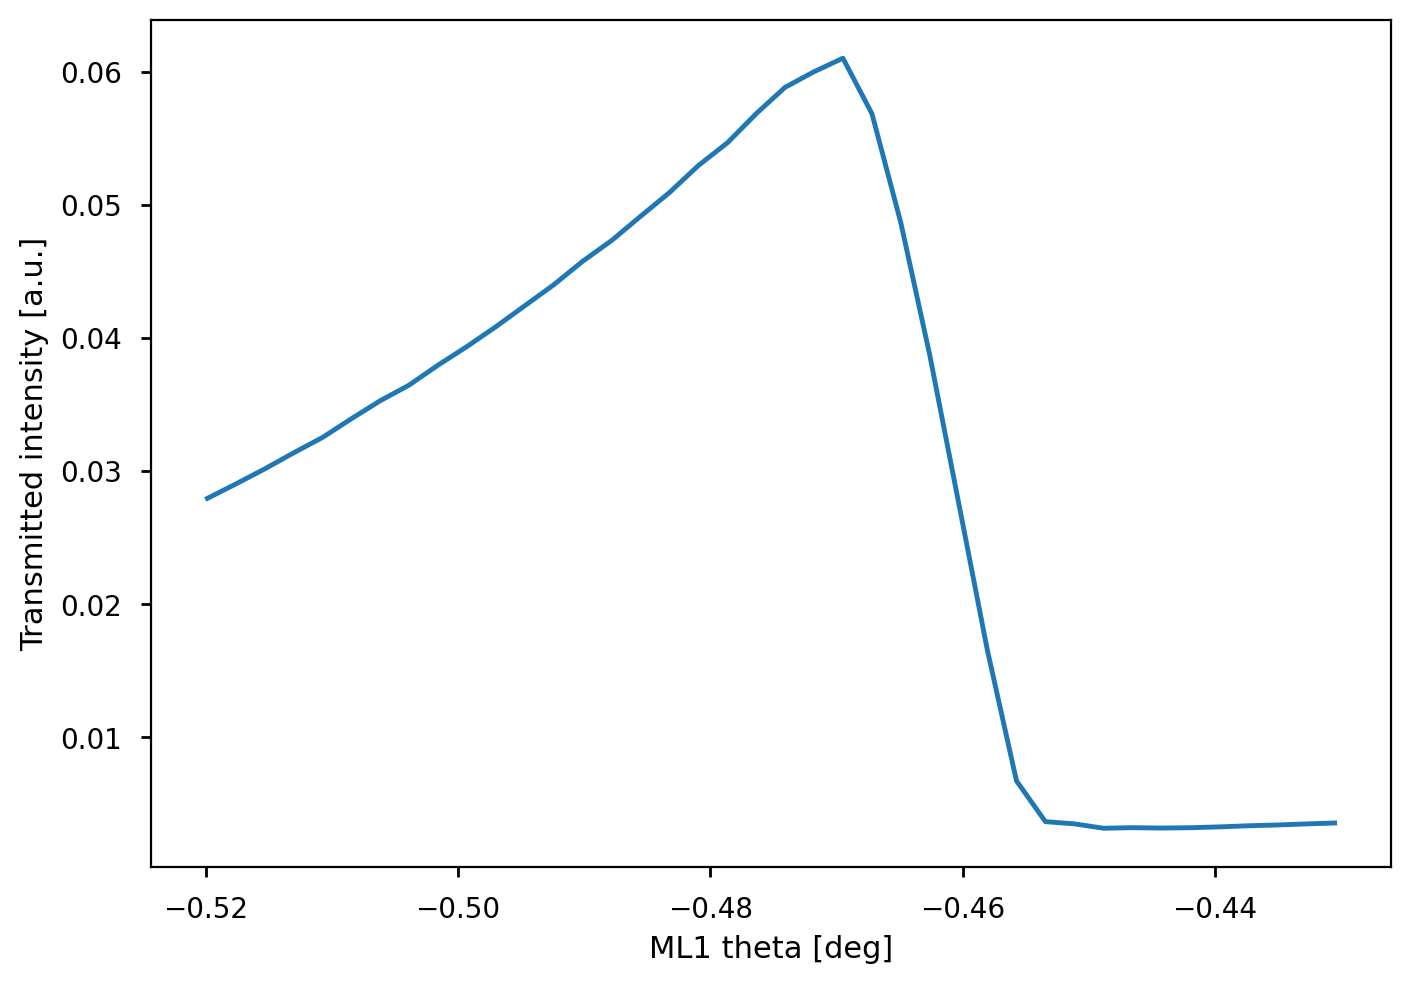

In [130]:
plt.plot(ML1_p_edge[:-1],I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 4.4 Perform curve fit

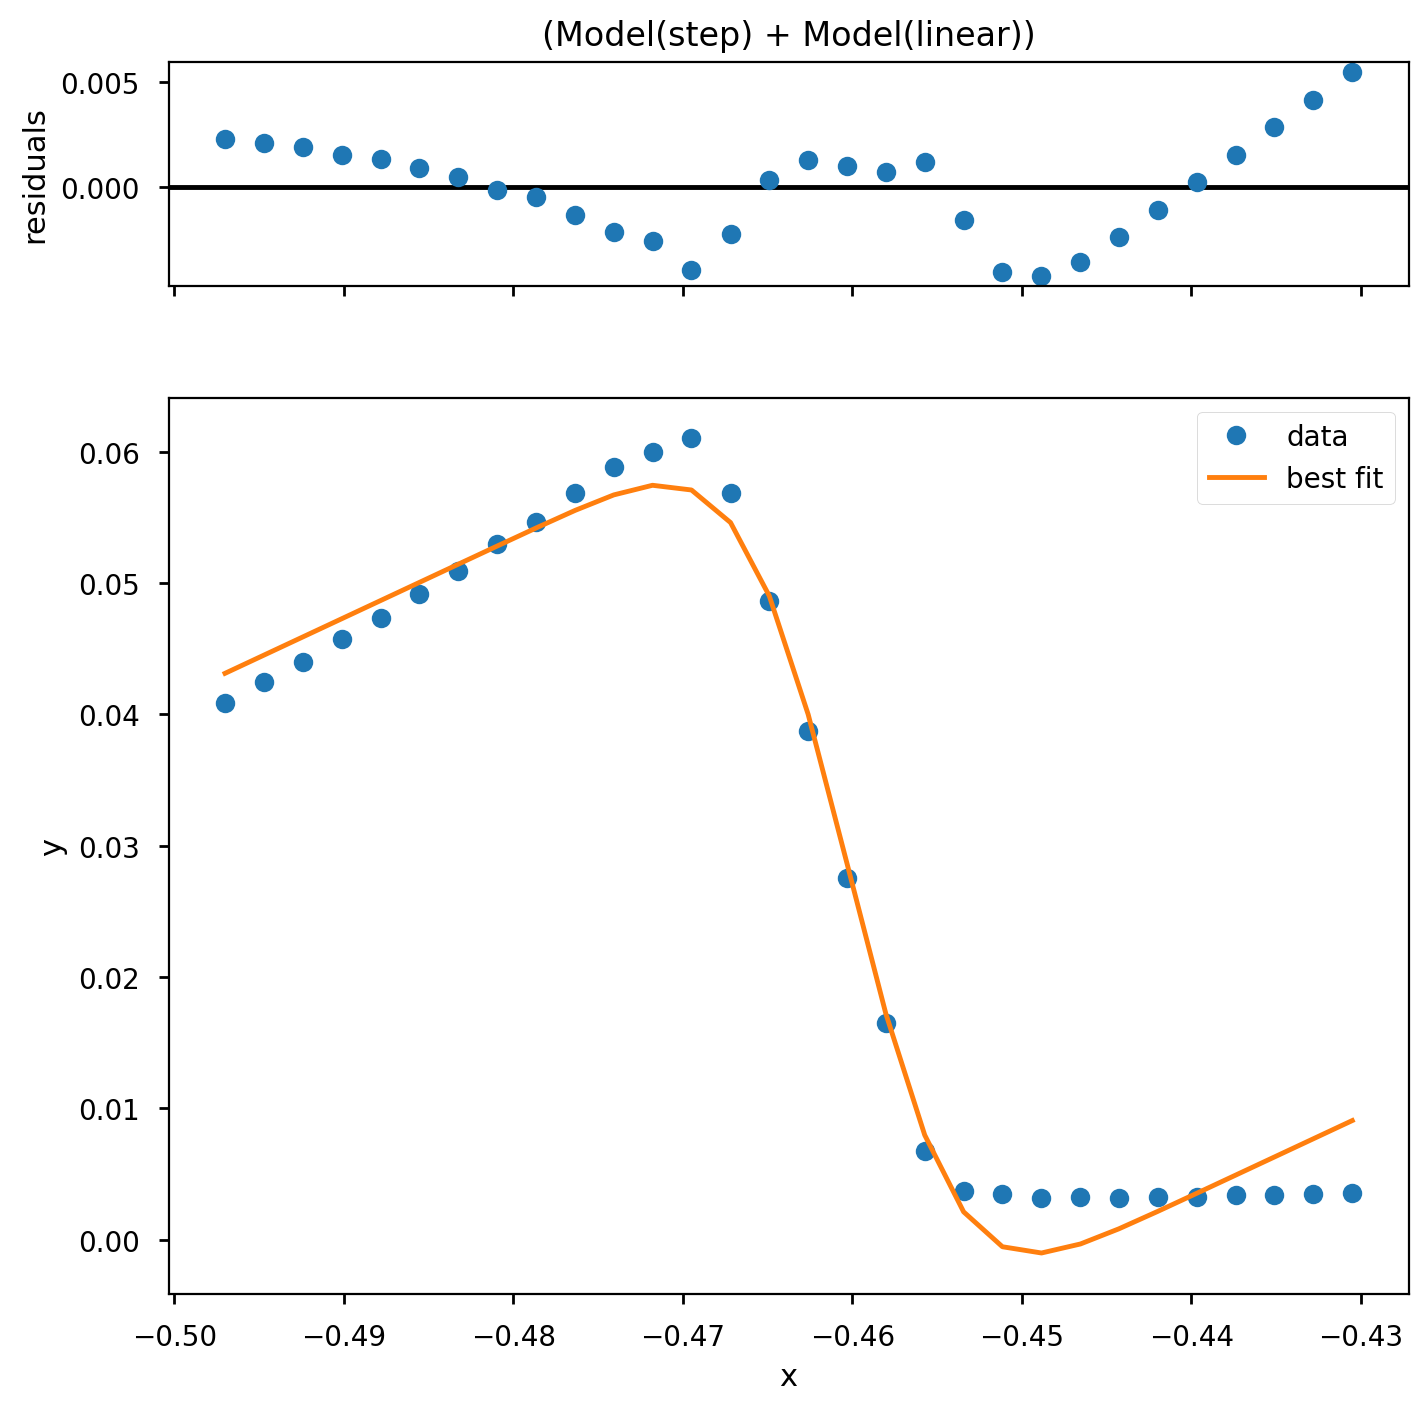

In [137]:
fit_profile(ML1_p_edge[10:-1], I_norm[10:], profile='step', background='linear', plot=True) # , width=1400

## 5. STRIPE 1 - Cu - 8.979 keV
### 5.1 Read SSCAN data
Edge scan images

In [141]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/Cu/DMM_stripe1_Cu_scan_001.h5'

In [142]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(122, 2160, 2560)


Pitch cradles encoders readout

In [140]:
ML1_p_edge = [-1.05875237, -1.05651088, -1.05420012, -1.05191916, -1.04962777, -1.0473329, -1.04505218, -1.04275781, -1.04046146, -1.03817031, -1.03590648, -1.03359473, -1.0312944, -1.02900152, -1.02670988, -1.02442544, -1.02212213, -1.01984712, -1.01754853, -1.01527253, -1.01298685, -1.01070316, -1.00840034, -1.00609902, -1.00380316, -1.00150283, -0.999201755, -0.996917315, -0.994624434, -0.992330063, -0.990064492, -0.987783528, -0.985486922, -0.983171944, -0.980886511, -0.978594126, -0.976315893, -0.974019287, -0.971746765, -0.96941242, -0.967136174, -0.964851982, -0.96257077, -0.960281116, -0.95797011, -0.955674249, -0.953379381, -0.951099659, -0.948824405, -0.94650173, -0.944211331, -0.94194725, -0.939656852, -0.937349322, -0.935065627, -0.932770262, -0.930492278, -0.928167864, -0.925887149, -0.923591784, -0.921298406]
ML2_p_edge = [-1.05871042, -1.05647539, -1.05417183, -1.05189186, -1.04961785, -1.04731429, -1.04501495, -1.04272157, -1.04044185, -1.03816213, -1.03584715, -1.03356792, -1.03126759, -1.02897273, -1.02667662, -1.02440285, -1.02211916, -1.01979946, -1.01753886, -1.01521444, -1.01293373, -1.01062794, -1.00833183, -1.00604416, -1.00375301, -1.00146634, -0.99918339, -0.996878839, -0.994600358, -0.992297545, -0.990031478, -0.98771501, -0.985418652, -0.983153827, -0.980863428, -0.978564091, -0.976282631, -0.973964673, -0.971697364, -0.969389586, -0.967116319, -0.964818223, -0.962501755, -0.960206391, -0.95791475, -0.955626835, -0.953331718, -0.951037099, -0.948751914, -0.946477157, -0.944183531, -0.941878484, -0.939615396, -0.937310597, -0.935013991, -0.932722103, -0.930448091, -0.928130629, -0.925872011, -0.923569694, -0.921271847]
ML1_p_flat = [-1.05874517, -1.05652503, -1.05420732, -1.05192288, -1.04964515, -1.04733936, -1.04506783, -1.04277941, -1.04046617, -1.03817329, -1.03588662, -1.0336064, -1.03130681, -1.02900698, -1.0267218, -1.02442072, -1.02213305, -1.01983992, -1.01754828, -1.01527129, -1.01298636, -1.01067535, -1.00838867, -1.00610672, -1.00380341, -1.00150035, -0.999202252, -0.996914336, -0.994640075, -0.992330063, -0.990078148, -0.987783032, -0.985471529, -0.98318982, -0.980900911, -0.978597602, -0.976289575, -0.974002652, -0.971724419, -0.969426076, -0.967147098, -0.964833361, -0.962566301, -0.960261998, -0.957957696, -0.955685173, -0.953378885, -0.951110335, -0.948803301, -0.946521344, -0.944221759, -0.941938561, -0.939653376, -0.937355529, -0.935058923, -0.932758593, -0.930467698, -0.928181768, -0.925871259, -0.923583094, -0.921299648]
ML2_p_flat = [-1.05870793, -1.05647067, -1.05417655, -1.05190675, -1.04961636, -1.0473118, -1.04503481, -1.04270841, -1.04045402, -1.03813556, -1.03583771, -1.0335858, -1.03125592, -1.0289685, -1.02671013, -1.02437629, -1.02209929, -1.01980443, -1.01751924, -1.01521345, -1.01292851, -1.01064283, -1.00834424, -1.00604217, -1.00376344, -1.00146609, -0.999204494, -0.996899447, -0.994618483, -0.992288111, -0.990005657, -0.987721465, -0.985435039, -0.983148613, -0.980865911, -0.97853976, -0.976269968, -0.973966659, -0.971664591, -0.969377917, -0.967107877, -0.96480134, -0.962498775, -0.960208625, -0.95794231, -0.955630062, -0.953333456, -0.95105001, -0.948775998, -0.946487337, -0.944203145, -0.941876746, -0.939620362, -0.937302404, -0.935014488, -0.932715151, -0.930415317, -0.928132615, -0.925850658, -0.923554301, -0.921277558]

### 5.2 Correct flat-field

In [143]:
data_edge = data[0:61,:,:]
data_flat = data[61:,:,:]
print(data_edge.shape)

(61, 2160, 2560)


In [144]:
data_norm = data_edge/data_flat

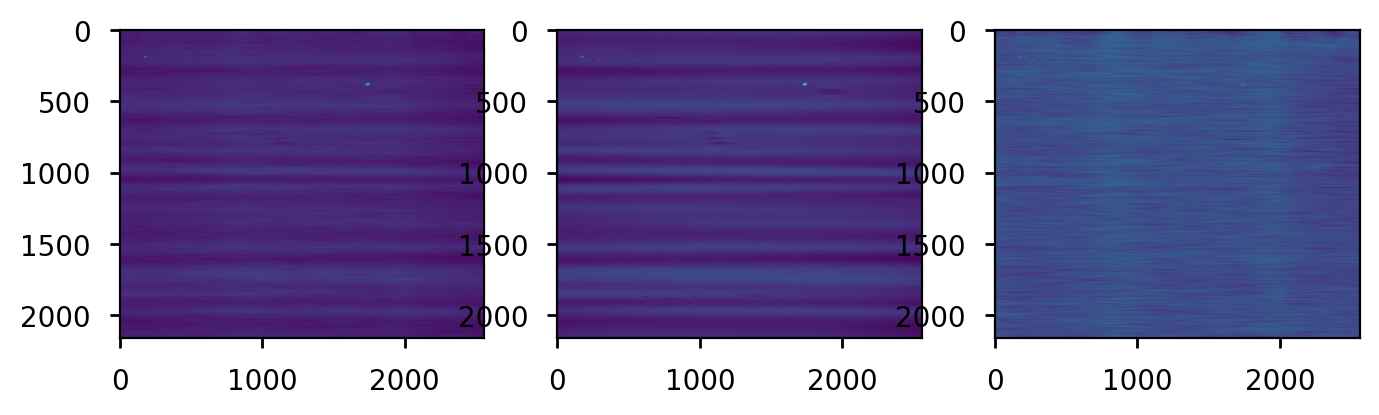

In [147]:
step = 45
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_edge[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 5.3 Get intensity average for each step

In [148]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

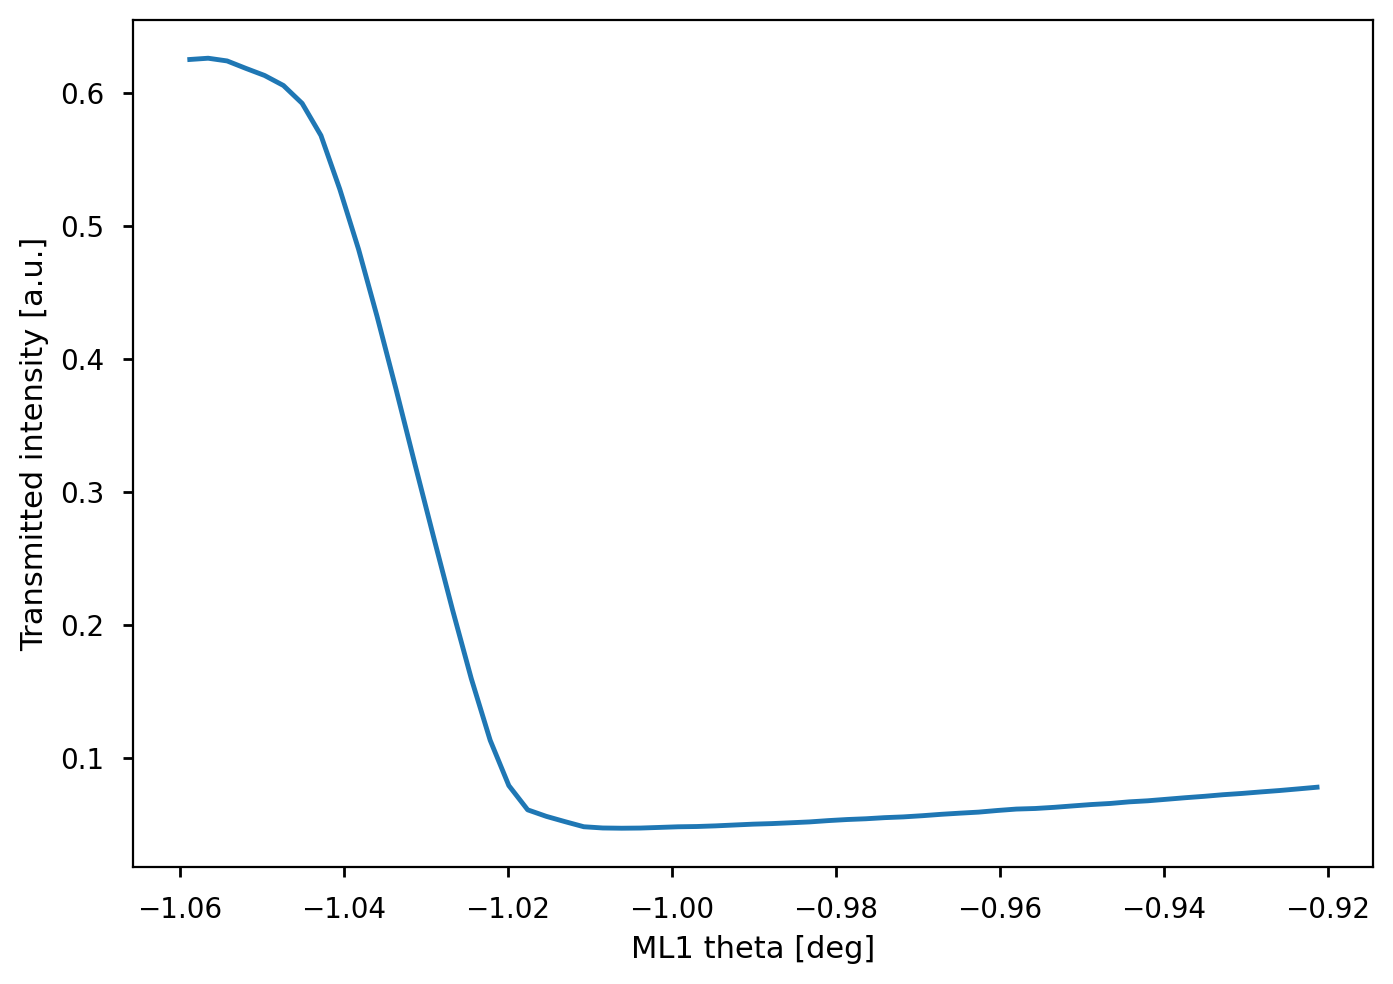

In [149]:
plt.plot(ML1_p_edge,I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 5.4 Perform curve fit

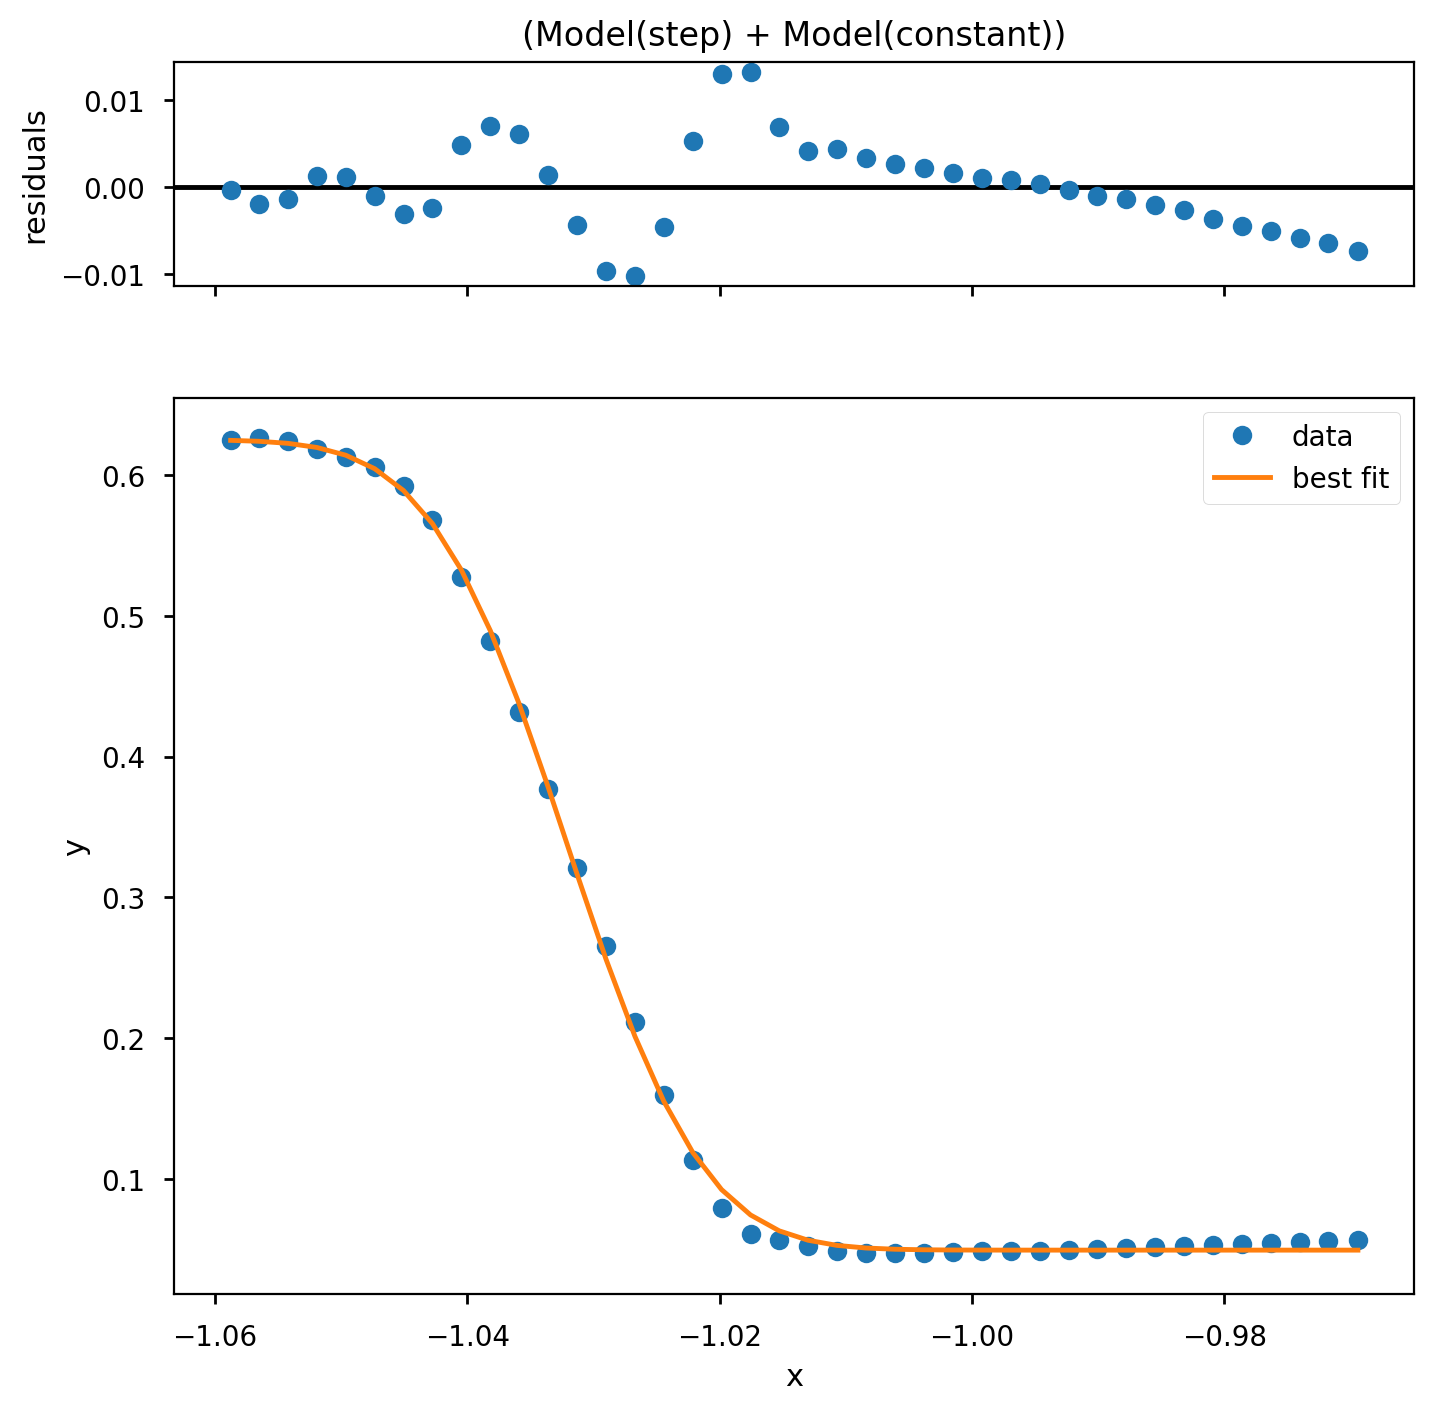

In [152]:
fit_profile(ML1_p_edge[:40], I_norm[:40], profile='step', background='constant', plot=True) # , width=1400